In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load dataset
data = pd.read_csv("spam.csv", encoding='latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data.shape

(5572, 5)

In [8]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
data.columns=["target", "message"]
data.head(2)

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [16]:
data["target"]=data["target"].replace("ham", 0)
data["target"]=data["target"].replace("spam", 1)
data.head()

C:\Users\monis\AppData\Local\Temp\ipykernel_15548\3801527146.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["target"]=data["target"].replace("spam", 1)


,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
data.isnull().sum()

target     0
message    0
dtype: int64

In [20]:
data.duplicated().sum()

403

In [22]:
len(data)

5572

In [24]:
data["target"].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

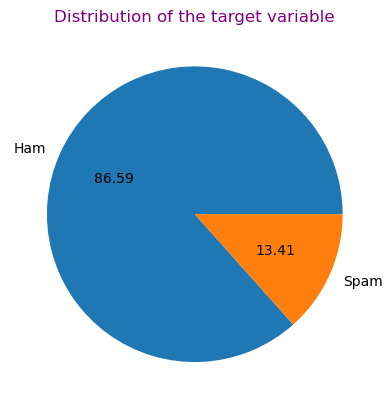

In [26]:
plt.pie(data["target"].value_counts(), labels=["Ham", "Spam"], autopct="%.2f")
plt.title("Distribution of the target variable", color = "purple")
plt.show()

#Data Cleaning

In [31]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\monis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
# Number of Characters
data['num_chars'] = data['message'].apply(len)

# Number of Words
data['num_words'] = data['message'].apply(lambda x: len(nltk.word_tokenize(x)))

# Number of Sentences
data['num_sentences'] = data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

data.head()

,target,message,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
# Describe function for ham messages
data[data['target'] == 0][['num_chars', 'num_words', 'num_sentences' ]].describe()

,num_chars,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
# Describe function for spam messages
data[data['target'] == 1][['num_chars', 'num_words', 'num_sentences' ]].describe()

,num_chars,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


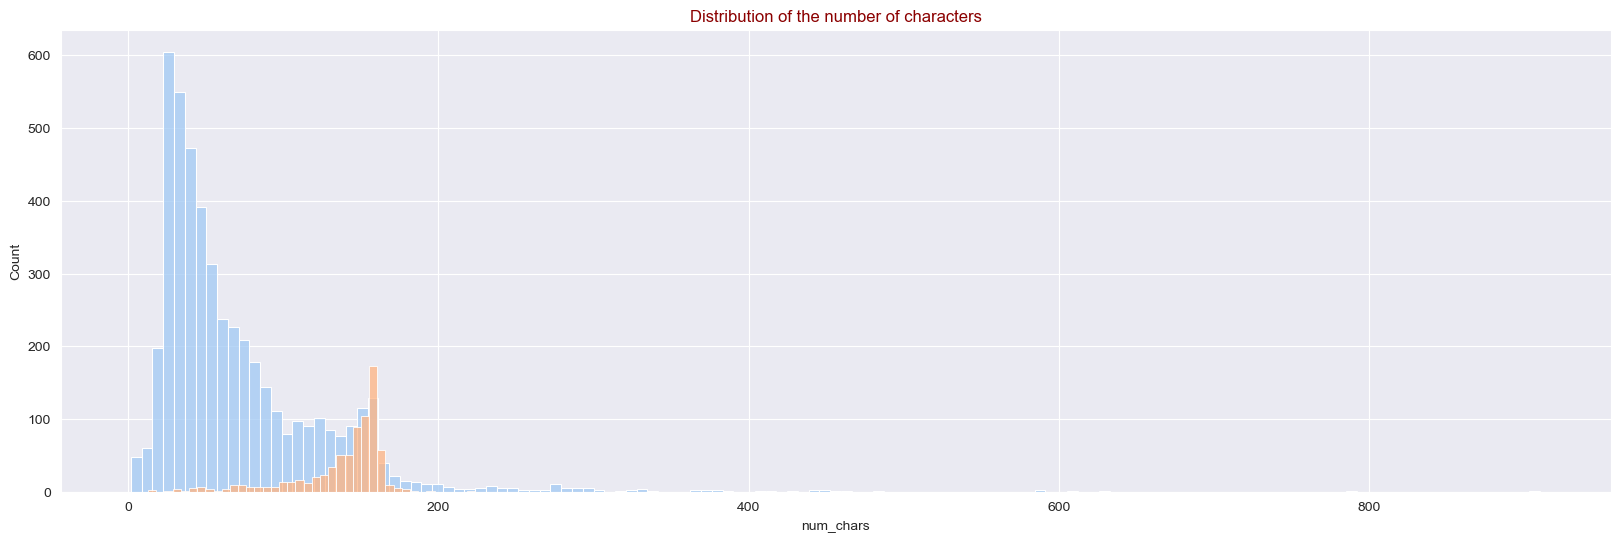

In [39]:
sns.set_palette('pastel')
sns.set_style('darkgrid')
plt.figure(figsize=(20, 6))
sns.histplot(data[data['target'] == 0]['num_chars'])
sns.histplot(data[data['target'] == 1]['num_chars'])
plt.title('Distribution of the number of characters', color = "darkred")
plt.show()

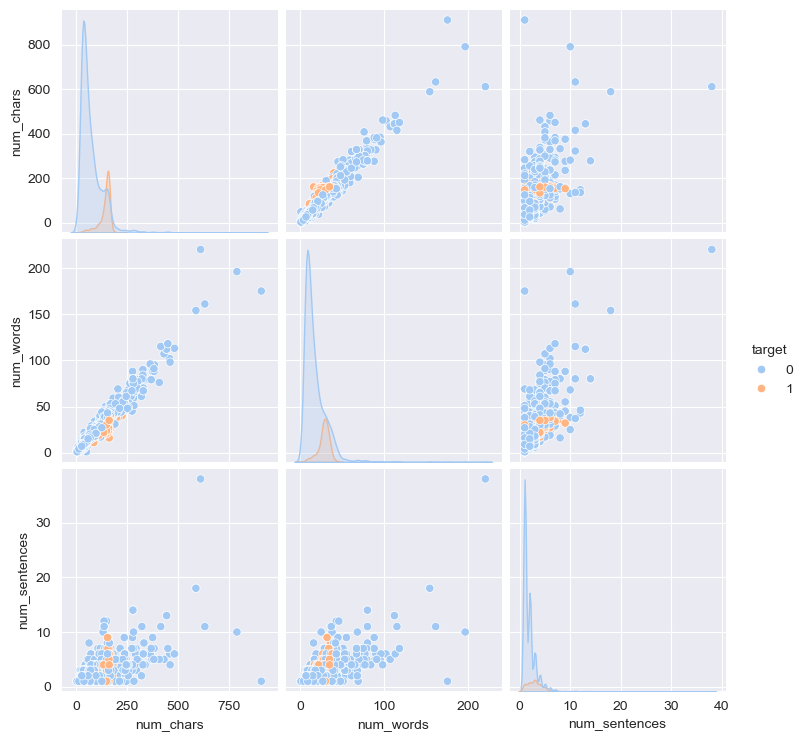

In [41]:
# Pairplot of the features 
sns.set_palette('pastel')
sns.set_style('darkgrid')
sns.pairplot(data, hue='target')
plt.show()

In [45]:
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.corr()

,target,num_chars,num_words,num_sentences
target,1.000000,0.387285,0.263221,0.265332
num_chars,0.387285,1.000000,0.966310,0.631881
num_words,0.263221,0.966310,1.000000,0.685165
num_sentences,0.265332,0.631881,0.685165,1.000000


<Axes: >

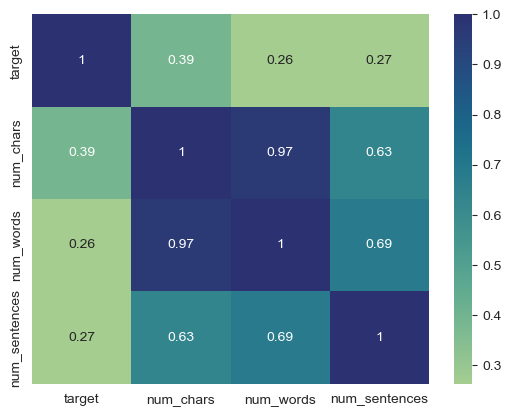

In [47]:
sns.heatmap(numeric_data.corr(), annot=True, cmap='crest')

In [49]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

In [53]:
ps = PorterStemmer()

In [55]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalnum()]
    stopwords = nltk.corpus.stopwords.words('english')
    text = [word for word in text if word not in stopwords]
    text = [ps.stem(word) for word in text]
    text = ' '.join(text)
    return text

In [57]:
data['transformed'] = data['message'].apply(transform_text)
data.head()

,target,message,num_chars,num_words,num_sentences,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [62]:
wc = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(data['transformed']))

Text(0.5, 1.0, 'Most common words in Ham messages')

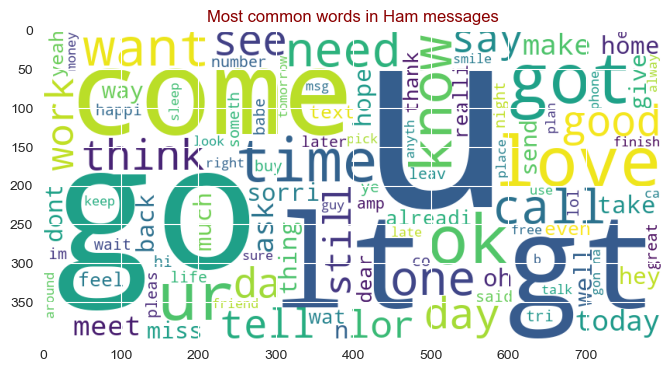

In [66]:
ham_wc = wc.generate(' '.join(data[data['target'] == 0]['transformed']))
plt.figure(figsize=(8, 6))
plt.imshow(ham_wc)
plt.title('Most common words in Ham messages', color = 'darkred')

Text(0.5, 1.0, 'Most common words in spam messages')

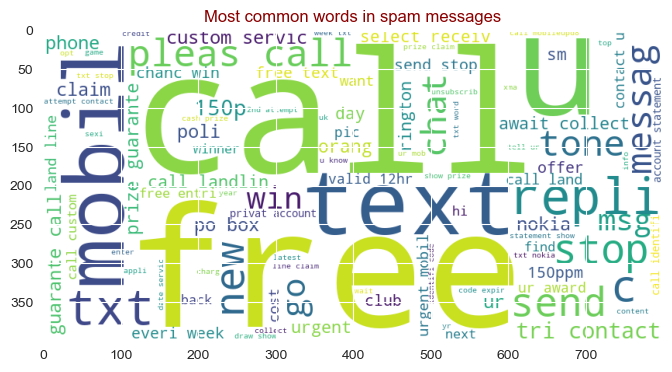

In [69]:
spam_wc = wc.generate(' '.join(data[data['target'] == 1]['transformed']))
plt.figure(figsize=(8, 6))
plt.imshow(spam_wc)
plt.title("Most common words in spam messages", color = "darkred")

#Model Building

#Naive Bayes

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [75]:
tf= TfidfVectorizer()
X=tf.fit_transform(data["transformed"]).toarray()

In [77]:
Y=data["target"]

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [81]:
print(len(X_train))
print(len(X_test))

4457
1115


In [83]:
bnb_model=BernoulliNB()
bnb_model.fit(X_train, Y_train)

BernoulliNB()

In [85]:
Y_pred=bnb_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9614349775784753


In [87]:
precision= precision_score(Y_test, Y_pred)
print("Precision_score:", precision)

Precision_score: 0.9694656488549618


In [89]:
recall = recall_score(Y_test, Y_pred)
print("Recall score:", recall)

Recall score: 0.7650602409638554


In [91]:
f1 = f1_score(Y_test, Y_pred)
print("F1_score:", f1)

F1_score: 0.8552188552188552


Text(0.5, 1.0, 'Confusion Matrix For Spam Detection')

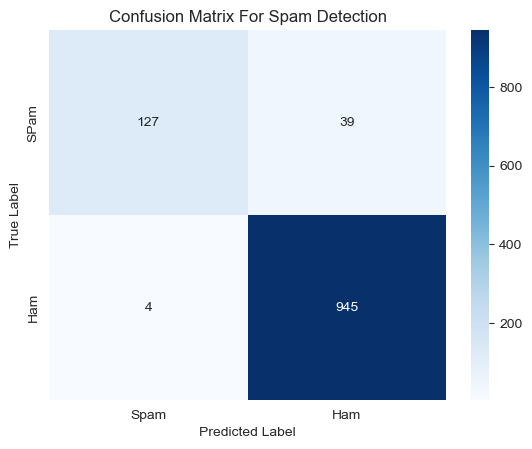

In [93]:
cm = confusion_matrix(Y_test, Y_pred, labels=[1, 0])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Spam", "Ham"], yticklabels=["SPam", "Ham"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Spam Detection")

#Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [98]:
lr_model= LogisticRegression()
lr_model.fit(X_train, Y_train)

LogisticRegression()

In [99]:
y_train1=lr_model.predict(X_train)
y_test1= lr_model.predict(X_test)
print("Accuracy X_Train", accuracy_score(Y_train, y_train1))
print("Accuracy X_Test", accuracy_score(Y_test, y_test1))
print("Cross_Validation", cross_val_score(lr_model, X_train, Y_train, cv=5).mean())

Accuracy X_Train 0.9649988781691721
Accuracy X_Test 0.947085201793722
Cross_Validation 0.9463770741797648


Text(52.722222222222214, 0.5, 'True Label')

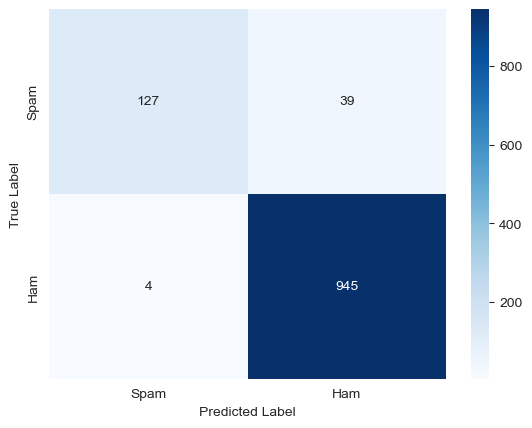

In [102]:
cm = confusion_matrix(Y_test, Y_pred, labels=[1, 0])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Spam", "Ham"], yticklabels=["Spam", "Ham"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

In [104]:
# Custom message prediction using logistic regression
custom_message = ["I'm back & we're packing the car now, I'll let you know if there's room"]
custom_message_vectorized = tf.transform(custom_message)
custom_prediction = lr_model.predict(custom_message_vectorized)[0]

print("\nCustom message prediction:", "Spam" if custom_prediction else "Not Spam")


Custom message prediction: Not Spam
